# Tasks
1. Importe cet ensemble de données de tweets dans un DataFrame.
2. Ne garde que les tweets positifs et négatifs (tu excluras donc les neutral). Quel est le pourcentage de tweets positifs/négatifs ?
3. Copie la colonne text dans une Série X, et la colonne sentiment dans une Série y. Applique un train test split avec le random_state = 32 et un train_size de 0.75.
4. Crée un modèle vectorizer avec scikit-learn en utilisant la méthode Countvectorizer. Entraîne ton modèle sur X_train, puis crée une matrice de features X_train_CV. Crée la matrice X_test_CV sans ré-entraîner le modèle. Le format de la matrice X_test_CV doit être 4091x15806 avec 44633 stored elements.
5. Entraîne maintenant une régression logistique avec les paramètres par défaut.
1 004 / 5 000
1. Imports this tweet dataset into a DataFrame.
2. Only keep positive and negative tweets (you will therefore exclude neutral ones). What is the percentage of positive/negative tweets?
3. Copy the text column into Series X, and the sentiment column into Series y. Apply a split test train with random_state = 32 and a train_size of 0.75.
4. Create a vectorizer model with scikit-learn using the Countvectorizer method. Train your model on X_train, then create an X_train_CV feature matrix. Creates the X_test_CV matrix without retraining the model. The format of the X_test_CV matrix must be 4091x15806 with 44633 stored elements.
5. Now results in logistic regression with default parameters. You should get the following results: 0.966 for the training test, and 0.877 for the test set.
6. Bonus step: try to display 10 tweets that were incorrectly predicted (false positives or false negatives). Would you have done better than the algorithm?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/NLP/train.csv"

df = pd.read_csv(path)
print(df.info())
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


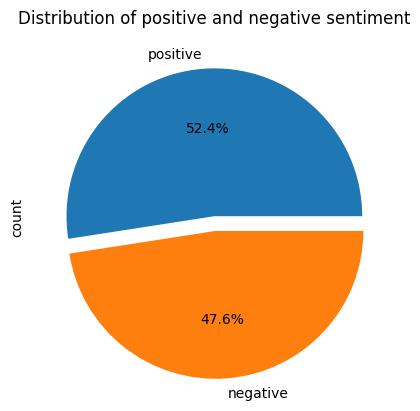

In [ ]:
import matplotlib.pyplot as plt

df = df.loc[df["sentiment"] != 'neutral']


df['sentiment'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', title = "Distribution of positive and negative sentiment")
plt.show();

In [ ]:
#Initialize X, y
X = df["text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, train_size=0.75)

# Fit model Vectorizer
vector = CountVectorizer().fit(X_train)

X_train_CV = vector.transform(X_train)
X_test_CV = vector.transform(X_test)
X_test_CV

<4091x15806 sparse matrix of type '<class 'numpy.int64'>'
	with 44633 stored elements in Compressed Sparse Row format>

In [ ]:
# Logistic Regression
model = LogisticRegression().fit(X_train_CV, y_train)

print("Score of train set:", model.score(X_train_CV, y_train))
print("Score of test set:", model.score(X_test_CV, y_test))

# Confusion matrix
 pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_CV)),
             index = model.classes_ + "ACTUAL",
             columns = model.classes_ + " PREDICTED")


Score of train set: 0.9663461538461539
Score of test set: 0.8772916157418724


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,negative PREDICTED,positive PREDICTED
negativeACTUAL,1700,235
positiveACTUAL,267,1889


In [ ]:
# Create a df with columns actual and predicted value
y_pred = pd.Series(model.predict(X_test_CV))

data = {"tweets": X_test.reset_index(drop=True),
        "actual_sentiment": y_test.reset_index(drop=True),
        "predicted_sentiment": y_pred}

df_test = pd.concat(data,
               axis = 1)
df_test

,tweets,actual_sentiment,predicted_sentiment
0,"- no, is buttfuck stupid. I`m just silly and...",negative,negative
1,get better omg i still dont believe that i di...,negative,negative
2,HollowbabesHere comes the utter shite #bgt <I ...,negative,positive
3,Thank You Clayton. Going to my favorite Greek...,positive,positive
4,I`m watching it at the moment -sighs- and st...,negative,negative
...,...,...,...
4086,I can`t take it,negative,negative
4087,so where r u spinning now that the Hookah is ...,negative,negative
4088,WHAT?! i was wanting to see that show!!,negative,negative
4089,Har vondt i ryggen My back hurts,negative,negative


In [ ]:
# 10 tweets that were incorrectly predicted
df_test.loc[df_test["actual_sentiment"] != df_test["predicted_sentiment"]].head(10)


,tweets,actual_sentiment,predicted_sentiment
2,HollowbabesHere comes the utter shite #bgt <I ...,negative,positive
10,SUFFICATION NO BREATHING. It`s okay. There`ll...,negative,positive
17,i wanna vote for Miley Cyrus for the mtv movie...,positive,negative
25,I love music so much that i`ve gone through pa...,negative,positive
27,"I can only message those who message me, if we...",positive,negative
48,"wish I could feel no pain (8) but it`s ok, at...",positive,negative
57,so glad i`m not at uni anymore,positive,negative
65,You`re not here. I hope you`re still resting....,positive,negative
70,"you`re missing out, bb! i`m such a cereal nu...",positive,negative
74,have an amazing time with your mommas tomorro...,negative,positive
